# Homework 4 - Getting to know your customers

## 1. Finding Similar Costumers

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [161]:
bank_transactions = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\ADM_HW4\bank_transactions.csv")

In [162]:
bank_transactions.dropna(inplace=True)
bank_transactions

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


<AxesSubplot:xlabel='CustGender', ylabel='Count'>

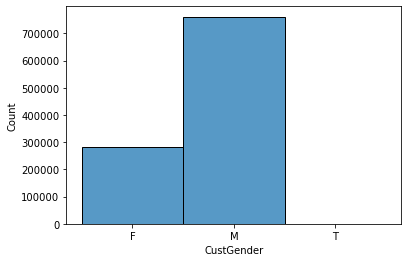

In [4]:
sns.histplot(bank_transactions['CustGender'])

In [5]:
bank_transactions = bank_transactions[(bank_transactions.CustGender != 'T')]

<AxesSubplot:xlabel='CustGender', ylabel='Count'>

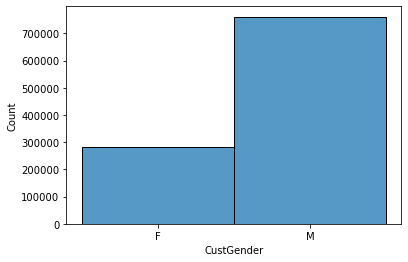

In [6]:
sns.histplot(bank_transactions['CustGender'])

In [7]:
bank_transactions.CustomerDOB = pd.to_datetime(bank_transactions.CustomerDOB) 
bank_transactions['CustomerAge'] = (( pd.to_datetime('today') - bank_transactions.CustomerDOB ) / np.timedelta64(1, 'Y')).round(0)

<AxesSubplot:xlabel='CustomerAge', ylabel='Count'>

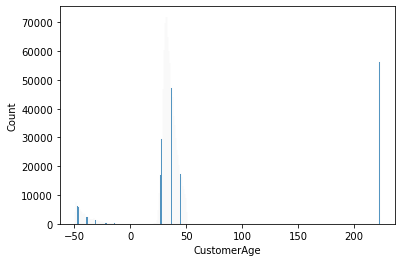

In [8]:
sns.histplot(bank_transactions['CustomerAge'])

In [9]:
bank_transactions = bank_transactions[bank_transactions["CustomerAge"] < 100]
bank_transactions = bank_transactions[bank_transactions["CustomerAge"] > 0 ]

<AxesSubplot:xlabel='CustomerAge', ylabel='Count'>

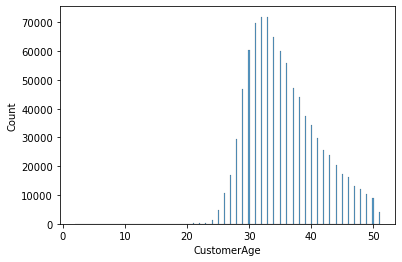

In [10]:
sns.histplot(bank_transactions['CustomerAge'])

In [244]:
users = bank_transactions[['CustomerDOB', 'CustomerID', 'CustGender', 'CustLocation', 'CustAccountBalance']]
users = users.drop_duplicates()

In [468]:
final_users = users[['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']]
final_users

,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,10/1/94,F,JAMSHEDPUR,17819.05
1,4/4/57,M,JHAJJAR,2270.69
2,26/11/96,F,MUMBAI,17874.44
3,14/9/73,F,MUMBAI,866503.21
4,24/3/88,F,NAVI MUMBAI,6714.43
...,...,...,...,...
1048562,8/4/90,M,NEW DELHI,7635.19
1048563,20/2/92,M,NASHIK,27311.42
1048564,18/5/89,M,HYDERABAD,221757.06
1048565,30/8/78,M,VISAKHAPATNAM,10117.87


In [262]:
query = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\ADM_HW4\query_users.csv")

In [263]:
query = query[(query.CustGender != 'T')]

In [265]:
final_query = query[['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']]
final_query

,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,27/7/78,M,DELHI,94695.61
1,6/11/92,M,PANCHKULA,7584.09
2,14/8/91,M,PATNA,7180.60
3,3/1/87,M,CHENNAI,56847.75
4,4/1/95,M,GURGAON,84950.13
5,10/1/81,M,WORLD TRADE CENTRE BANGALORE,23143.95
6,20/9/76,F,CHITTOOR,15397.80
7,10/4/91,M,MOHALI,426.30
8,19/3/90,M,MOHALI,4609.34
9,19/12/70,M,SERAMPORE,6695988.46


In [411]:
def permute(x, a, b, c):
    return (a*x + b) % c

def minHash(elem, permutations, c):
    for a,b in permutations:
        return min([permute(hash(elem), a, b, c)])

def create_signature(row, permutations, c):
    signature = np.zeros(len(row), int)
    for idx, elem in enumerate(row):
        value = minHash(elem, permutations, c)
        signature[idx] = value
    return signature

def jaccard_similarity(signA, signB):
    return sum([1 for a, b in zip(signA, signB) if a == b]) / len(signA)

In [246]:
nPermutations = 600
permutations = [(random.randint(0,60), random.randint(0,60)) for _ in range(nPermutations)]

final_users = users[['CustomerDOB','CustGender', 'CustLocation', 'CustAccountBalance']]
final_users['signature'] = [create_signature(row, permutations, 191) for row in final_users.to_numpy()]
final_users

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,signature
0,10/1/94,F,JAMSHEDPUR,17819.05,"[178, 124, 50, 104]"
1,4/4/57,M,JHAJJAR,2270.69,"[63, 59, 145, 187]"
2,26/11/96,F,MUMBAI,17874.44,"[137, 124, 179, 70]"
3,14/9/73,F,MUMBAI,866503.21,"[80, 124, 179, 158]"
4,24/3/88,F,NAVI MUMBAI,6714.43,"[147, 124, 50, 70]"
...,...,...,...,...,...
1048562,8/4/90,M,NEW DELHI,7635.19,"[9, 59, 104, 128]"
1048563,20/2/92,M,NASHIK,27311.42,"[174, 59, 133, 162]"
1048564,18/5/89,M,HYDERABAD,221757.06,"[6, 59, 11, 183]"
1048565,30/8/78,M,VISAKHAPATNAM,10117.87,"[181, 59, 74, 34]"


In [266]:
final_query = query[['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']]
final_query['signature'] = [create_signature(row, permutations, 191) for row in final_query.to_numpy()]
final_query

C:\Users\Marina\AppData\Local\Temp\ipykernel_26232\2385629873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_query['signature'] = [create_signature(row, permutations, 191) for row in final_query.to_numpy()]


,CustomerDOB,CustGender,CustLocation,CustAccountBalance,signature
0,27/7/78,M,DELHI,94695.61,"[179, 59, 11, 99]"
1,6/11/92,M,PANCHKULA,7584.09,"[153, 59, 128, 21]"
2,14/8/91,M,PATNA,7180.60,"[183, 59, 99, 40]"
3,3/1/87,M,CHENNAI,56847.75,"[42, 59, 165, 11]"
4,4/1/95,M,GURGAON,84950.13,"[81, 59, 158, 11]"
5,10/1/81,M,WORLD TRADE CENTRE BANGALORE,23143.95,"[25, 59, 151, 51]"
6,20/9/76,F,CHITTOOR,15397.80,"[138, 124, 133, 3]"
7,10/4/91,M,MOHALI,426.30,"[98, 59, 140, 149]"
8,19/3/90,M,MOHALI,4609.34,"[179, 59, 140, 170]"
9,19/12/70,M,SERAMPORE,6695988.46,"[129, 59, 89, 31]"


In [463]:
def find_neighbours(users, query, threshold):
    neighbours = {idx:[] for idx, val in enumerate(query.signature)}
    for idx1, signA in query['signature'].iteritems():
        for idx2, signB in users['signature'].iteritems():
            sim = jaccard_similarity(signA, signB)
            if sim >= threshold:
                if idx1 in neighbours:
                    neighbours[idx1].append(idx2)
            
    return neighbours

In [464]:
neighbours = find_neighbours(final_users, final_query, 1)
neighbours

{0: [13236,
  37224,
  83263,
  151529,
  222237,
  229160,
  455920,
  540073,
  575969,
  607320,
  707362,
  707363,
  738676,
  747502,
  866136,
  893637,
  899473,
  1045323],
 1: [48947,
  59588,
  63347,
  98219,
  105734,
  106643,
  141210,
  150921,
  158994,
  159533,
  205578,
  207764,
  258553,
  286007,
  346097,
  348393,
  353773,
  356310,
  360576,
  376217,
  407639,
  455663,
  548918,
  592059,
  602289,
  606960,
  618517,
  729233,
  782096,
  782266,
  875562,
  890131,
  1021379,
  1028475,
  1045328],
 2: [67717, 154137, 291248, 315449, 345272, 346489, 347453, 532453],
 3: [68841,
  74996,
  139808,
  209660,
  217752,
  242611,
  250402,
  489310,
  490844,
  513558,
  524455,
  547469,
  547952,
  549439,
  585176,
  606203,
  613141,
  622968,
  627900,
  640748,
  683917,
  701462,
  726386,
  778584,
  788625,
  794059,
  841821,
  898866,
  899452,
  1047880],
 4: [11626,
  15345,
  18790,
  42568,
  44129,
  181486,
  314837,
  343621,
  393425,
  430

In [465]:
final_query['neighbours'] = list(neighbours.values())
final_query

C:\Users\Marina\AppData\Local\Temp\ipykernel_26232\2219191824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_query['neighbours'] = list(neighbours.values())


,CustomerDOB,CustGender,CustLocation,CustAccountBalance,signature,neighbours
0,27/7/78,M,DELHI,94695.61,"[179, 59, 11, 99]","[13236, 37224, 83263, 151529, 222237, 229160, ..."
1,6/11/92,M,PANCHKULA,7584.09,"[153, 59, 128, 21]","[48947, 59588, 63347, 98219, 105734, 106643, 1..."
2,14/8/91,M,PATNA,7180.60,"[183, 59, 99, 40]","[67717, 154137, 291248, 315449, 345272, 346489..."
3,3/1/87,M,CHENNAI,56847.75,"[42, 59, 165, 11]","[68841, 74996, 139808, 209660, 217752, 242611,..."
4,4/1/95,M,GURGAON,84950.13,"[81, 59, 158, 11]","[11626, 15345, 18790, 42568, 44129, 181486, 31..."
5,10/1/81,M,WORLD TRADE CENTRE BANGALORE,23143.95,"[25, 59, 151, 51]","[56177, 58226, 165088, 203825, 206044, 264972,..."
6,20/9/76,F,CHITTOOR,15397.80,"[138, 124, 133, 3]","[78071, 147746, 150895, 151131, 201146, 320261..."
7,10/4/91,M,MOHALI,426.30,"[98, 59, 140, 149]","[21984, 79635, 144794, 228290, 263333, 264331,..."
8,19/3/90,M,MOHALI,4609.34,"[179, 59, 140, 170]","[122716, 600251, 610735]"
9,19/12/70,M,SERAMPORE,6695988.46,"[129, 59, 89, 31]","[24582, 91586, 118978, 379110, 425479, 426497,..."


In [429]:
final_query.loc[0]

CustomerDOB                                                     27/7/78
CustGender                                                            M
CustLocation                                                      DELHI
CustAccountBalance                                             94695.61
signature                                             [179, 59, 11, 99]
neighbours            [13169, 36989, 82666, 150417, 220583, 227459, ...
Name: 0, dtype: object

In [471]:
print(users.loc[37224])
print(users.loc[83263])

CustomerDOB            27/7/78
CustomerID            C6167050
CustGender                   M
CustLocation             DELHI
CustAccountBalance    94695.61
Name: 37224, dtype: object
CustomerDOB            27/7/78
CustomerID            C1067043
CustGender                   M
CustLocation             DELHI
CustAccountBalance    94695.61
Name: 83263, dtype: object


# Command Line

## 1. Which location has the maximum number of purchases been made?

In [3]:
bank_transactions.groupby(['CustLocation'])['CustLocation'].count().sort_values(ascending=False).head(1)

CustLocation
MUMBAI    103595
Name: CustLocation, dtype: int64

## 2. In the dataset provided, did females spend more than males, or vice versa?

In [4]:
avgFemalesTransactions = bank_transactions.loc[bank_transactions.CustGender == "F"]['TransactionAmount (INR)'].mean()
avgMalesTransactions = bank_transactions.loc[bank_transactions.CustGender == "M"]['TransactionAmount (INR)'].mean()
print("Total average spent by females: ", avgFemalesTransactions)
print("Total average spent by males: ", avgMalesTransactions)

Total average spent by females:  1655.7337531566973
Total average spent by males:  1543.5643777774615


## 3. Report the customer with the highest average transaction amount in the dataset.


In [5]:
bank_transactions.groupby('CustomerID')['TransactionAmount (INR)'].mean().sort_values(ascending=False).head(1)

CustomerID
C7319271    1560034.99
Name: TransactionAmount (INR), dtype: float64